In [2]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
df = pd.read_csv("USA_Housing.csv")

In [8]:
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

/Users/administrator/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


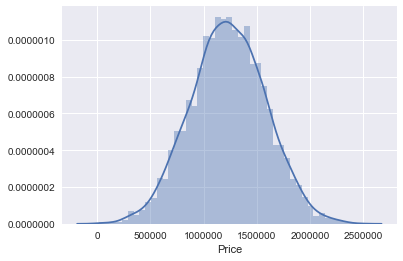

In [14]:
sns.distplot(df['Price'])

In [15]:
# Splitting 
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [17]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [18]:
y = df['Price']

# Linear Regression 

- you import the train_test_split
- THEN you split the data to train and test
- THEN you import linear regression and INSTANTIATE IT
- Folowing that, fit to the trainign data

## You then can access all the information of the model
- such as intercept_, coeff_
- you can try to make a DF of the data with X.columns to the current coeffs

## Prediction
- rquared = metrics.explained_variance_score(y_test, predictions)
- preictions = lm.precict
plt.scatter

In [32]:
from sklearn.model_selection import train_test_split

In [22]:
# test soze - 0.3-0.4 (how many to test) and random state to ensure random _state split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=101)

In [23]:

from sklearn.linear_model import LinearRegression


In [24]:
lm = LinearRegression()

In [25]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
print(lm.intercept_)

-2640159.79685


In [27]:
print(lm.coef_)

[  2.15282755e+01   1.64883282e+05   1.22368678e+05   2.23380186e+03
   1.51504200e+01]


In [29]:
# Make a Dataframe with these coefficients
cdf = pd.DataFrame(lm.coef_, X.columns,columns=['Coeff'])

In [30]:
cdf

Coeff
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

In [31]:
# A 1 unity increase in average area income, increases the price by 21 (assuming rest is cetris paribus)

## Predictions

In [45]:
predictions = lm.predict(X_test)

In [46]:
predictions

array([ 1260960.70567627,   827588.75560329,  1742421.24254344, ...,
         372191.40626917,  1365217.15140899,  1914519.5417888 ])

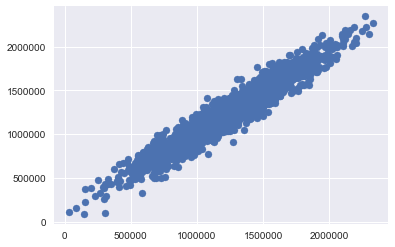

In [47]:
# this graph 
plt.scatter(y_test, predictions)

/Users/administrator/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


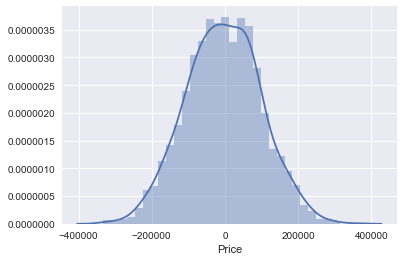

In [48]:
sns.distplot((y_test-predictions))

In [49]:
from sklearn import metrics

In [50]:
metrics.mean_absolute_error(y_test,predictions)

82288.22251914948

In [52]:
mse = metrics.mean_squared_error(y_test,predictions)

In [53]:
np.sqrt(mse)

102278.82922290901

# BIAS VARIANCE TRADE OFF
- where we are adding noise by adding complexity (flexibility)
- Training error goes down the 'trade off' is the overfit
- OVERFIT -> large errors or new data.
- 